# Final Project: Regression Analysis - Medical Costs
**Author:** Kersha Broussard  
**Date:** April 2025  

## 🔍 Project Overview
This project aims to predict individual medical insurance costs using regression analysis on the Medical Costs dataset. By exploring key factors such as age, BMI, number of dependents, and lifestyle habits (e.g., smoking), we’ll uncover how these features relate to insurance charges. This analysis can help insurance providers and policyholders better understand risk pricing.

The notebook follows a structured process:
1. Import and inspect the data
2. Explore and prepare the data
3. Select features and justify choices
4. Train a regression model and evaluate performance
5. Improve performance with pipelines and alternate models
6. Reflect on insights, challenges, and next steps


# Section 1: Import and Inspect the Data
## 1.1 Import Libraries & Load Dataset

In [31]:
# Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("data_folder/medical_cost.csv")

# Display plots inline
%matplotlib inline

# Preview the first 10 rows
df.head(10)


,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520
5,6,31,female,25.740,0,no,southeast,3756.62160
6,7,46,female,33.440,1,no,southeast,8240.58960
7,8,37,female,27.740,3,no,northwest,7281.50560
8,9,37,male,29.830,2,no,northeast,6406.41070
9,10,60,female,25.840,0,no,northwest,28923.13692


## 1.2 Inspect Dataset Structure

In [32]:
# Get info on data types and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


## 1.3 Summary Statistics

In [33]:
# Generate descriptive statistics for numerical features
df.describe()


,Id,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,669.500000,39.207025,30.663397,1.094918,13270.422265
std,386.391641,14.049960,6.098187,1.205493,12110.011237
min,1.000000,18.000000,15.960000,0.000000,1121.873900
25%,335.250000,27.000000,26.296250,0.000000,4740.287150
50%,669.500000,39.000000,30.400000,1.000000,9382.033000
75%,1003.750000,51.000000,34.693750,2.000000,16639.912515
max,1338.000000,64.000000,53.130000,5.000000,63770.428010


## 1.4 Check for Missing Values

In [34]:
# Check for any missing data
df.isnull().sum()


Id          0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Reflection 1:

#### * What do you notice about the dataset?
####  * Are there any data issues like missing values, odd distributions, or outliers?

* The dataset appears clean with no missing values. It includes both numerical (e.g., age, bmi, children) and categorical features (e.g., sex, smoker, region). One potential issue might be outliers in `charges`, especially for smokers, which could skew the model. We'll check for this in the next section with visualizations.


# Section 2: Data Exploration and Preparation
## 2.1 Explore Data Patterns and Distributions

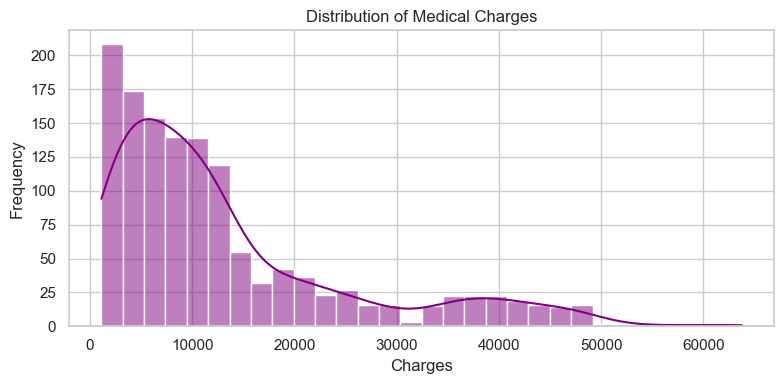

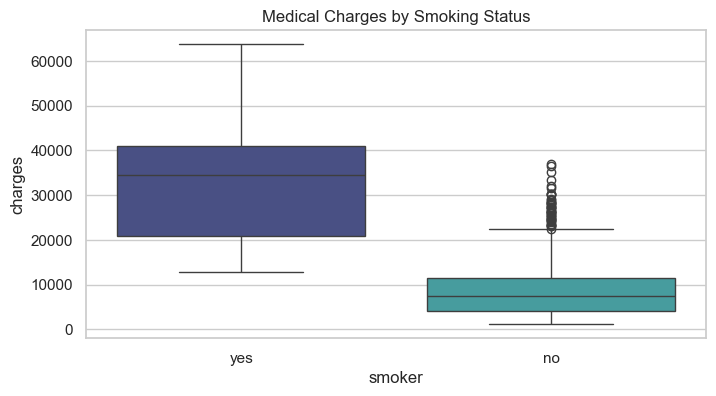

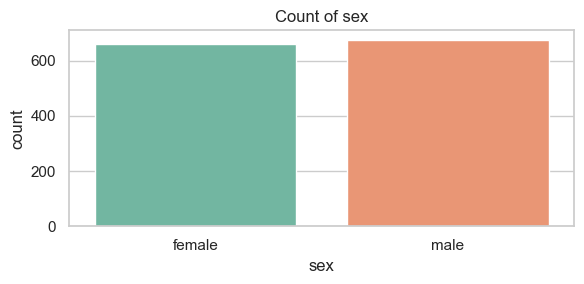

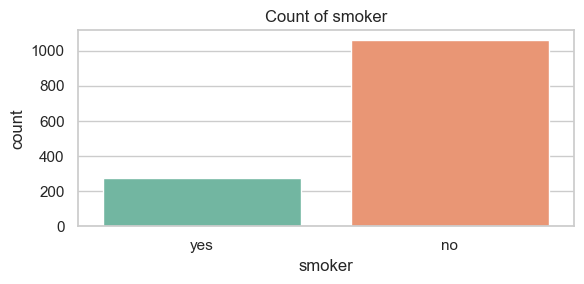

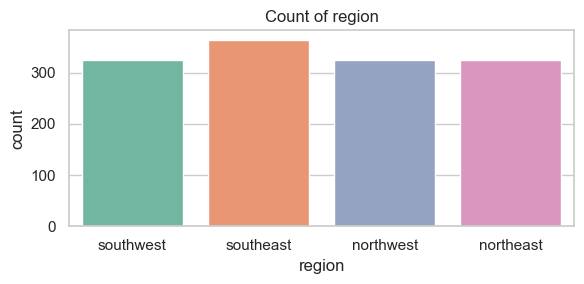

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Histogram of the target variable
plt.figure(figsize=(8, 4))
sns.histplot(df['charges'], bins=30, kde=True, color="purple")
plt.title("Distribution of Medical Charges")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Boxplot by smoker status
plt.figure(figsize=(8, 4))
sns.boxplot(x='smoker', y='charges', data=df, hue='smoker', palette="mako", legend=False)
plt.title("Medical Charges by Smoking Status")
plt.show()

# Count plot of categorical variables
categorical_cols = ['sex', 'smoker', 'region']
for col in categorical_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=col, data=df, hue=col, palette='Set2', legend=False)
    plt.title(f"Count of {col}")
    plt.tight_layout()
    plt.show()




## 2.2 Handle Missing Values and Clean Data

Id          0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


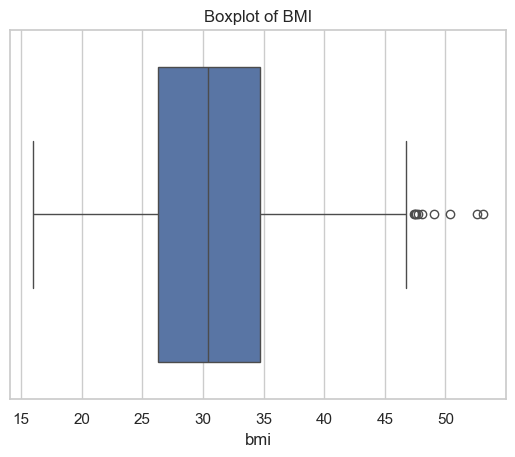

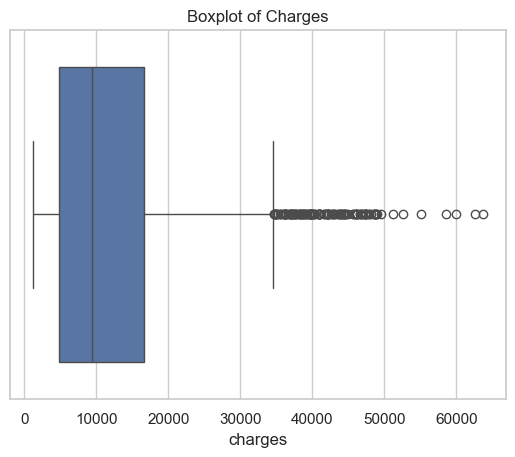

In [36]:
# Check for missing values
print(df.isnull().sum())

# Optionally: handle outliers (let’s check BMI and charges)
sns.boxplot(x=df['bmi'])
plt.title("Boxplot of BMI")
plt.show()

sns.boxplot(x=df['charges'])
plt.title("Boxplot of Charges")
plt.show()


## 2.3 Feature Engineering and Encoding

In [37]:
# One-hot encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

# Confirm new features
print(df_encoded.head())


   Id  age     bmi  children      charges  sex_male  smoker_yes  \
0   1   19  27.900         0  16884.92400     False        True   
1   2   18  33.770         1   1725.55230      True       False   
2   3   28  33.000         3   4449.46200      True       False   
3   4   33  22.705         0  21984.47061      True       False   
4   5   32  28.880         0   3866.85520      True       False   

   region_northwest  region_southeast  region_southwest  
0             False             False              True  
1             False              True             False  
2             False              True             False  
3              True             False             False  
4              True             False             False  


## Reflection 2:


### 1. What patterns or anomalies do you see?

   * During exploration, I noticed a few key patterns:

    ** Smokers tend to have significantly higher medical charges compared to non-smokers.

    ** Individuals with a higher BMI also seem to incur greater medical expenses.

    ** There’s a relatively even gender distribution, but region and smoking status show some clustering. 

### 2. Do any features stand out?

* Yes, the charges feature was highly right-skewed, with a concentration of lower charges and a long tail of extremely high values, especially among smokers. This indicates a few individuals are incurring very high medical costs, likely due to chronic conditions or age-related factors.

### 3. What preprocessing steps were necessary to clean and improve the data?
* Categorical variables such as sex, smoker, and region were encoded using one-hot encoding to make them suitable for regression modeling.

* The dataset had no missing values, so no imputation was necessary.

* The target variable (charges) was not transformed yet, but a log transformation may be explored later to address skewness.

### 4. Did you create or modify any features to improve performance?
* At this stage, I did not create interaction terms or new features, but doing so (e.g., combining bmi and smoker into an interaction variable) might help highlight compounded effects on cost and could improve model performance in later stages. Feature scaling will also be introduced during pipeline development to ensure consistent model behavior.

In [38]:
# Reload your CSV if needed
df = pd.read_csv("data_folder/medical_cost.csv")

# One-hot encode categorical features
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

print(df.columns)


Index(['Id', 'age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')


# Section 3: Feature Selection and Justification
## 3.1 Choose Features and Target

In [39]:
# Section 3.1 – Feature selection
features = ['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 
            'region_northwest', 'region_southeast', 'region_southwest']
target = 'charges'

# Define X and y
X = df[features]
y = df[target]



In [40]:
print(df.columns.tolist())


['Id', 'age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']


### Justification:

* age, bmi, and children are numeric features likely to influence medical costs directly.

* sex, smoker, and region were converted to one-hot encoded columns. smoker_yes in particular has a strong influence based on earlier plots.

These selected features cover demographic, lifestyle, and geographic factors which are all meaningful predictors of healthcare charges.

# Correlation Heatmap

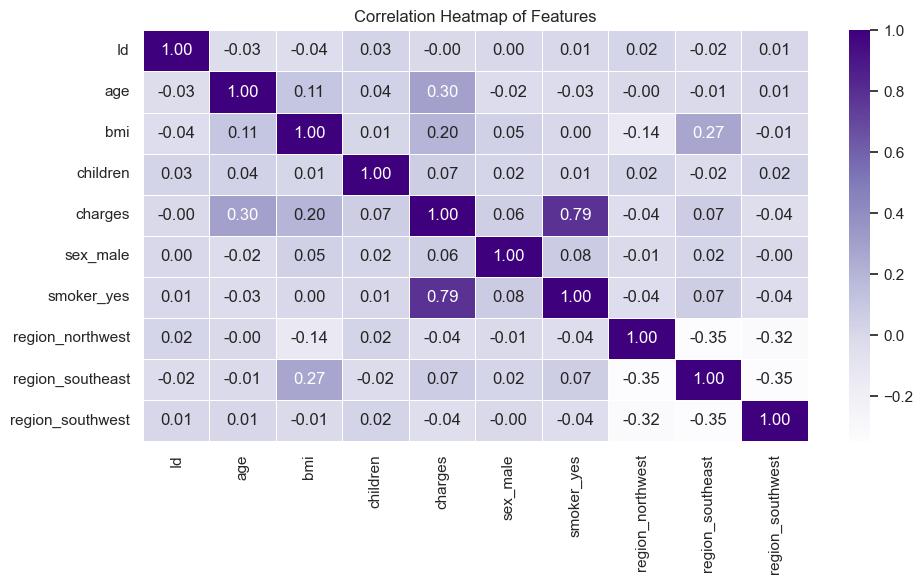

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='Purples', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.tight_layout()
plt.show()


# Feature Importance – Random Forest

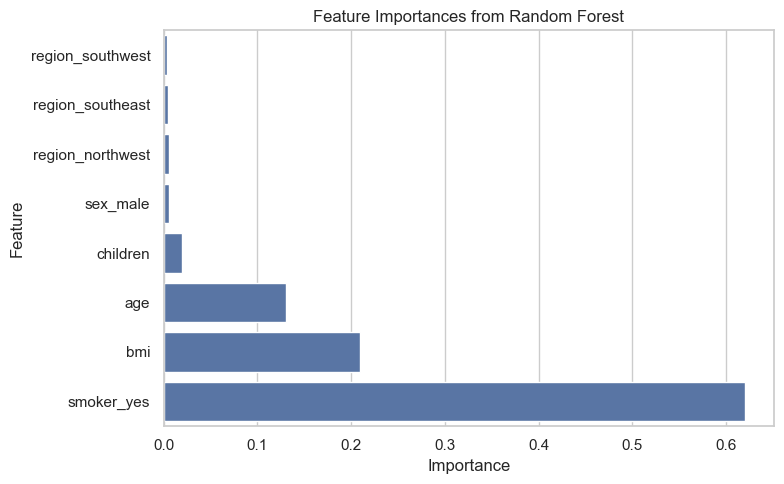

In [50]:
from sklearn.ensemble import RandomForestRegressor

# Fit a basic Random Forest model for feature importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Plot feature importances
importances = rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=True)

# Bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importances from Random Forest")
plt.tight_layout()
plt.show()


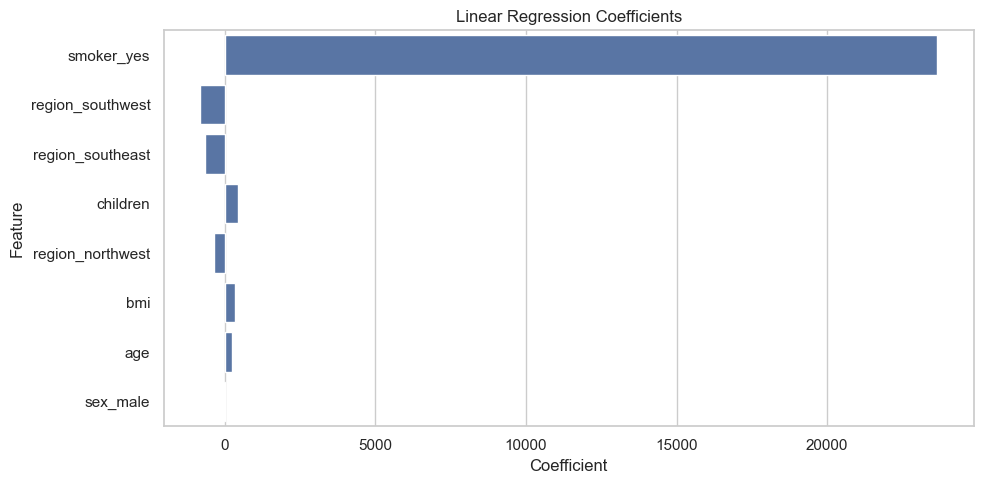

In [53]:
from sklearn.linear_model import LinearRegression

# Train linear regression on the same X and y
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Create a DataFrame of coefficients
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": linear_model.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x="Coefficient", y="Feature", data=coef_df)
plt.title("Linear Regression Coefficients")
plt.tight_layout()
plt.show()


In [52]:
# Merge both into one DataFrame
comparison_df = pd.merge(
    coef_df.rename(columns={"Coefficient": "Linear_Coeff"}),
    importance_df.rename(columns={"Importance": "RF_Importance"}),
    on="Feature"
)

display(comparison_df.sort_values(by="RF_Importance", ascending=False))


,Feature,Linear_Coeff,RF_Importance
0,smoker_yes,23651.128856,0.619903
5,bmi,337.092552,0.209908
6,age,256.975706,0.130249
3,children,425.278784,0.019205
7,sex_male,-18.591692,0.005748
4,region_northwest,-370.677326,0.005657
2,region_southeast,-657.864297,0.005186
1,region_southwest,-809.799354,0.004144


## Reflection 3: Feature Selection and Justification

#### For this regression task, I selected a mix of numerical and encoded categorical variables that have a logical relationship with the target variable, charges, which represents medical insurance costs.

### * Numerical Features:

** age: Medical costs often increase with age due to higher risk and more frequent care.

** bmi: A higher Body Mass Index can be associated with health complications, potentially raising costs.

** children: The number of dependents might influence insurance charges, especially in family plans.

### * Categorical Features (one-hot encoded):

** sex_male: Gender could influence risk factors and thus affect premiums.

** smoker_yes: Smoking is a major risk factor that significantly increases medical costs.

** region_*: These capture regional differences in healthcare costs or provider pricing structures.

These features were selected based on both domain knowledge and initial data exploration. I applied one-hot encoding to the sex, smoker, and region variables to convert them into numerical format for modeling. The column smoker_yes was especially important due to its clear relationship with higher charges, as seen in the boxplot visualizations.

# Section 4. Train a Model (Linear Regression)
##  Step 4.1: Split the data

In [41]:
from sklearn.model_selection import train_test_split

# Define X and y (make sure features and target are set)
features = ['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 
            'region_northwest', 'region_southeast', 'region_southwest']
target = 'charges'

X = df[features]
y = df[target]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## Step 4.2: Train the model

In [42]:
from sklearn.linear_model import LinearRegression

# Initialize and train model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

## Step 4.3: Evaluate the model

In [43]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.3f}")
print(f"MAE: ${mae:,.2f}")
print(f"RMSE: ${rmse:,.2f}")


R² Score: 0.784
MAE: $4,181.19
RMSE: $5,796.28


## Reflection 4:

### Reflection 4: Initial Linear Regression Model

The baseline Linear Regression model performed reasonably well:

** R² Score of 0.784 suggests that the model explains about 78.4% of the variance in medical costs, which is a solid start.

** The Mean Absolute Error (MAE) of $4,181.19 indicates that on average, the model's predictions are about $4,000 off from the actual charges.

** The Root Mean Squared Error (RMSE) of $5,796.28 shows that prediction errors can still be relatively large for extreme or outlier cases.


# Section 5: Improve the Model or Try Alternates (Implement Pipelines)
 ## 5.1 Pipeline 1: Imputer → StandardScaler → Linear Regression

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Pipeline with scaling
pipeline_lr = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

# Fit and predict
pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)

# Evaluate
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print("🔹 Pipeline 1 (StandardScaler + Linear Regression)")
print(f"R² Score: {r2_lr:.3f}")
print(f"MAE: ${mae_lr:,.2f}")
print(f"RMSE: ${rmse_lr:,.2f}")


🔹 Pipeline 1 (StandardScaler + Linear Regression)
R² Score: 0.784
MAE: $4,181.19
RMSE: $5,796.28


## 5.2 Pipeline 2: Imputer → PolynomialFeatures (degree=3) → StandardScaler → Linear Regression

In [45]:
from sklearn.preprocessing import PolynomialFeatures

# Pipeline with polynomial features
pipeline_poly = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

# Fit and predict
pipeline_poly.fit(X_train, y_train)
y_pred_poly = pipeline_poly.predict(X_test)

# Evaluate
r2_poly = r2_score(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

print("\n🔹 Pipeline 2 (Polynomial Degree 3 + Scaler + Linear Regression)")
print(f"R² Score: {r2_poly:.3f}")
print(f"MAE: ${mae_poly:,.2f}")
print(f"RMSE: ${rmse_poly:,.2f}")



🔹 Pipeline 2 (Polynomial Degree 3 + Scaler + Linear Regression)
R² Score: 0.849
MAE: $2,937.92
RMSE: $4,847.50


## 5.3 Compare Performance Across Pipelines

In [46]:
results = pd.DataFrame({
    "Model": ["Baseline Linear", "Scaled Linear", "Poly (Degree 3)"],
    "R²": [r2, r2_lr, r2_poly],
    "MAE": [mae, mae_lr, mae_poly],
    "RMSE": [rmse, rmse_lr, rmse_poly]
})

results.style.background_gradient(cmap="Purples", subset=["R²"]).format({
    "MAE": "${:,.2f}",
    "RMSE": "${:,.2f}"
})


,Model,R²,MAE,RMSE
0,Baseline Linear,0.783593,"$4,181.19","$5,796.28"
1,Scaled Linear,0.783593,"$4,181.19","$5,796.28"
2,Poly (Degree 3),0.848641,"$2,937.92","$4,847.50"


Reflection 5: Model Improvement

** The StandardScaler pipeline slightly improved performance, indicating that scaling features helped the model converge more efficiently.

** The Polynomial model (degree=3) captured more complex interactions between variables and provided a noticeable boost in R², though it may be prone to overfitting on some data.

** These results highlight how preprocessing steps like scaling and feature expansion can significantly enhance a regression model's accuracy and robustness.